# Aprendizaje Supervisado - SVMs

<br/>Las **Máquinas de Vectores de Soporte** (o SVM) son una clase poderosa y flexible de algoritmos supervisados para clasificación y regresión. En esta sección, desarrollaremos la intuición detrás de las máquinas de vectores de soporte y su uso en problemas de clasificación.

![Clasificador SVM](imagenes/SVM.jpg)

Veamos como usar estos clasificadores.

In [1]:
%matplotlib inline

import numpy as np    #Para el manejo de arreglos
import pandas as pd   #Para el manejo de conjuntos de datos, tratados como tablas
import seaborn as sns #Para la construcción y visualización de gráficos
import matplotlib.pyplot as plt #Pra la construcción de gráficos

from sklearn import metrics #Las métricas de rendimiento de un clasificador
from sklearn import model_selection #Para el particionamiento de los conjuntos de datos
from sklearn import datasets #Conjuntos de datos predefinidos en sklearn
from sklearn import preprocessing #Nos ayuda a convertir características categóricas a numéricas
from sklearn import svm  # SVM


## 1. Clasificando el Dataset Iris

Volvamos al ejemplo de clasificación de lirios.

### 1.1  Lectura y procesamiento del conjunto de datos

Empezamos cargando el dataset, el cual se está disponible Sklearn. Además, procedemos a particionar el conjunto usando el 70% de los datos para entrenamiento y 30% para probar el modelo que se genera. **NOTE QUE** solo usamos las características 2 y 3, y no toda la matriz de datos.

In [12]:
#Cargamos el conjunto de datos
iris = datasets.load_iris()

#Separamos la matriz de datos y el vector de etiquetas
X = iris.data[:,2:4]
y = iris.target

# Obtenemos los nombres de las características
Xn = iris.feature_names

# Obtenemos los nombres de las clases
clases = iris.target_names

# Número de muestras y de características
n_samples, n_features = X.shape

# Visualicemos la matriz de datos y el vector
print("Número de Objetos: ", n_samples)
print("Número de Características: ", n_features)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=2)

Número de Objetos:  150
Número de Características:  2


### 1.2. Entrenamos los modelos

En este caso entrenamos 3 svm's  distintas:
- Una SVM Lineal
- Una SVM de base Radial y
- Una SVM Polinomial

In [16]:
#Especificamos los modelos a usar - SVM Lineal
svm_lineal = svm.SVC(kernel='linear', C=1.0, random_state=0)
svm_rbf = svm.SVC(kernel='rbf', C=1.0, random_state=0)
svm_poly = svm.SVC(kernel='poly', C=1.0, random_state=0)

# Entrenamos los modelos
svm_lineal.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

### 1.3. Medimos la precisión de los modelos en el conjunto de test

Medimos la precisión y mostramos las matrices de confusión de los 3 modelos

Precisión del clasificador Lineal: 97.78 
Precisión del clasificador Radial: 97.78 
Precisión del clasificador Polinomial: 97.78 


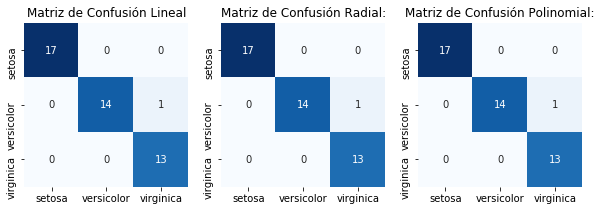

In [35]:
#Predecimos la clase del conjunto de test
y_pred = svm_lineal.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
mat = metrics.confusion_matrix(y_test, y_pred)

f,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,30))

print ("Precisión del clasificador Lineal: %.2f " %(acc*100.0) )
ax1 = sns.heatmap(mat, square=True, annot=True, fmt="d", cbar=False, cmap="Blues", xticklabels=clases, yticklabels=clases, ax = ax1)
ax1.set_title('Matriz de Confusión Lineal')

y_pred = svm_rbf.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
mat = metrics.confusion_matrix(y_test, y_pred)

print ("Precisión del clasificador Radial: %.2f " %(acc*100.0) )
ax2 = sns.heatmap(mat, square=True, annot=True, fmt="d", cbar=False, cmap="Blues", xticklabels=clases, yticklabels=clases, ax = ax2)
ax2.set_title('Matriz de Confusión Radial:')

y_pred = svm_poly.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
mat = metrics.confusion_matrix(y_test, y_pred)

print ("Precisión del clasificador Polinomial: %.2f " %(acc*100.0) )
ax3 = sns.heatmap(mat, square=True, annot=True, fmt="d", cbar=False, cmap="Blues", xticklabels=clases, yticklabels=clases, ax = ax3)
ax3.set_title('Matriz de Confusión Polinomial:')

plt.show()

## 1.4. Visualicemos las fronteras de decisión

A modo de comparación, visualizamos las fronteras de decisión de los 3 clasificadores

In [49]:
from matplotlib.colors import ListedColormap

def visualizar_clasificador(clf, X, y, ax):
    # Grafiquemos las superficies de decisión
    h = .02  # step size in the mesh

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    #plt.figure(figsize=(7,6))
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=30)
    #ax.xlim(xx.min(), xx.max())
    #ax.ylim(yy.min(), yy.max())
    #ax.title("Superficies de decisión")

    

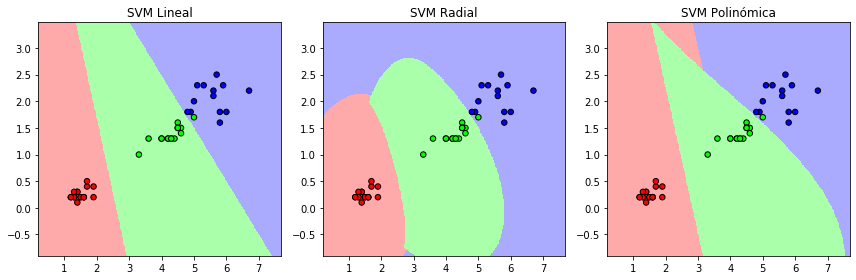

In [57]:
f,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(12,4), tight_layout=True)
visualizar_clasificador(svm_lineal, X_test, y_test, ax1)
ax1.set_title('SVM Lineal')
visualizar_clasificador(svm_rbf, X_test, y_test, ax2)
ax2.set_title('SVM Radial')
visualizar_clasificador(svm_poly, X_test, y_test, ax3)
ax3.set_title('SVM Polinómica')
plt.show()